In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



#   Regularization



This dataset is available on the github url:  **https://github.com/supportvectors/ml-100**. 

## Prerequisites

Before you study this notebook, you must have gone through and understood the detailed notes in data science notebooks till Lesson-14.

Many of the pertinent discussions are present therein; for brevity, we will not repeat those explanations, and will omit some of the steps, so that we can focus on the main topic on this notebook.

## Lab Goals

* We will observe the effects of regularization

## Outcome

This lab should have given you some fluency with regularization methods.

[-0.02509198  0.20125397  0.26862101  0.35306503  0.37564817  0.48675446
  0.57828339  0.85101301  0.90911189  1.04161452]


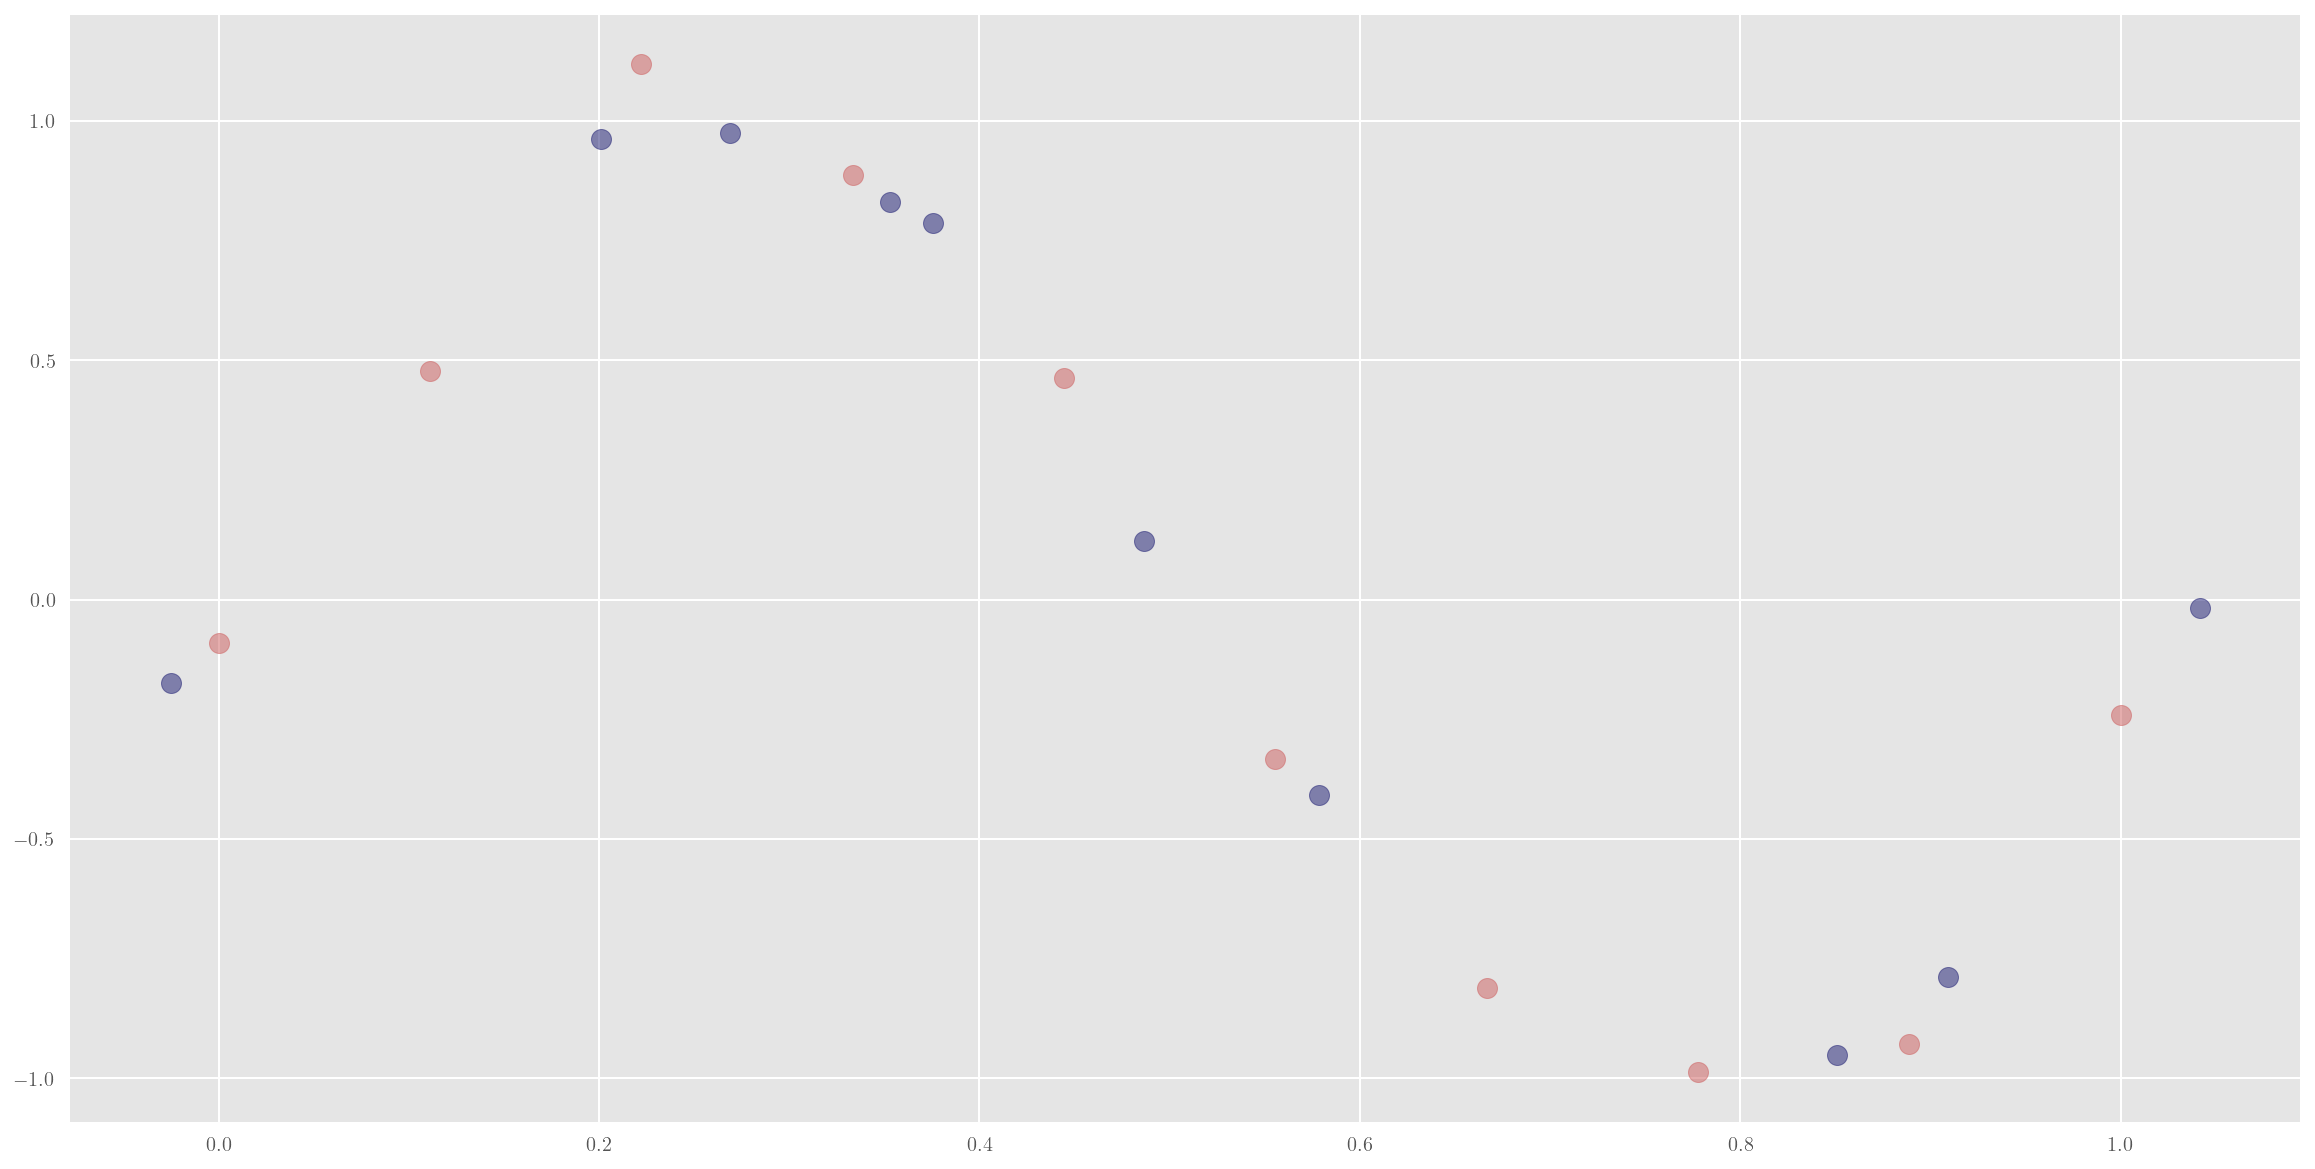

In [2]:
size = 10
x_train = np.linspace(0, 1, size)
x_test = np.random.uniform(low=-0.1, high=0.1, size=size) + np.linspace(0,1, size)
print(x_test)
y_test = np.sin(6*x_test) + 0.1* np.random.normal(0, 0.5, size)
y_train = np.sin(6*x_train) + 0.2* np.random.normal(0, 0.5, size)
plt.scatter(x_train,y_train, c='indianred', s=100, alpha=0.5, label='training data')
plt.scatter(x_test,y_test, c='midnightblue', s=100, alpha=0.5, label='test data')

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

degree      = 11
scaler      = StandardScaler()
polynomials = PolynomialFeatures(degree)
regression  = LinearRegression()

model = Pipeline(steps=[
    ('standard-scaler', scaler),
    ('polynomials', polynomials),
    ('regression', regression)
])
model

Pipeline(steps=[('standard-scaler', StandardScaler()),
                ('polynomials', PolynomialFeatures(degree=11)),
                ('regression', LinearRegression())])

In [4]:
x_train = x_train.reshape((x_train.shape[0],1))
x_test = x_test.reshape((x_test.shape[0], 1))

model.fit(x_train, y_train)
print ("The cofficients: {}".format(model.named_steps['regression'].coef_))

The cofficients: [ 3.42875468e-13 -2.39895879e+00 -2.59322825e-01  3.71030283e+00
  5.00831504e-01 -3.10990942e+00  2.91873432e-02 -8.92281544e-01
 -4.50957305e-01  2.10955556e+00  1.49471013e-01 -5.76882036e-01]


## Model diagnostics
Let us see now good this model is at prediction.

In [5]:
ŷ = model.predict(x_test)
print(x_test)
r2= r2_score(y_test, ŷ)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, ŷ))
r2 = r2_score(y_test, ŷ)
print(rf"Coefficient of Determination (R^2):{r2}")

[[-0.02509198]
 [ 0.20125397]
 [ 0.26862101]
 [ 0.35306503]
 [ 0.37564817]
 [ 0.48675446]
 [ 0.57828339]
 [ 0.85101301]
 [ 0.90911189]
 [ 1.04161452]]
Mean squared error: 16.45
Coefficient of Determination (R^2):-33.664007038018376


This model is clearly a disaster! Let us understand why this is the case, by plotting the model over the data.


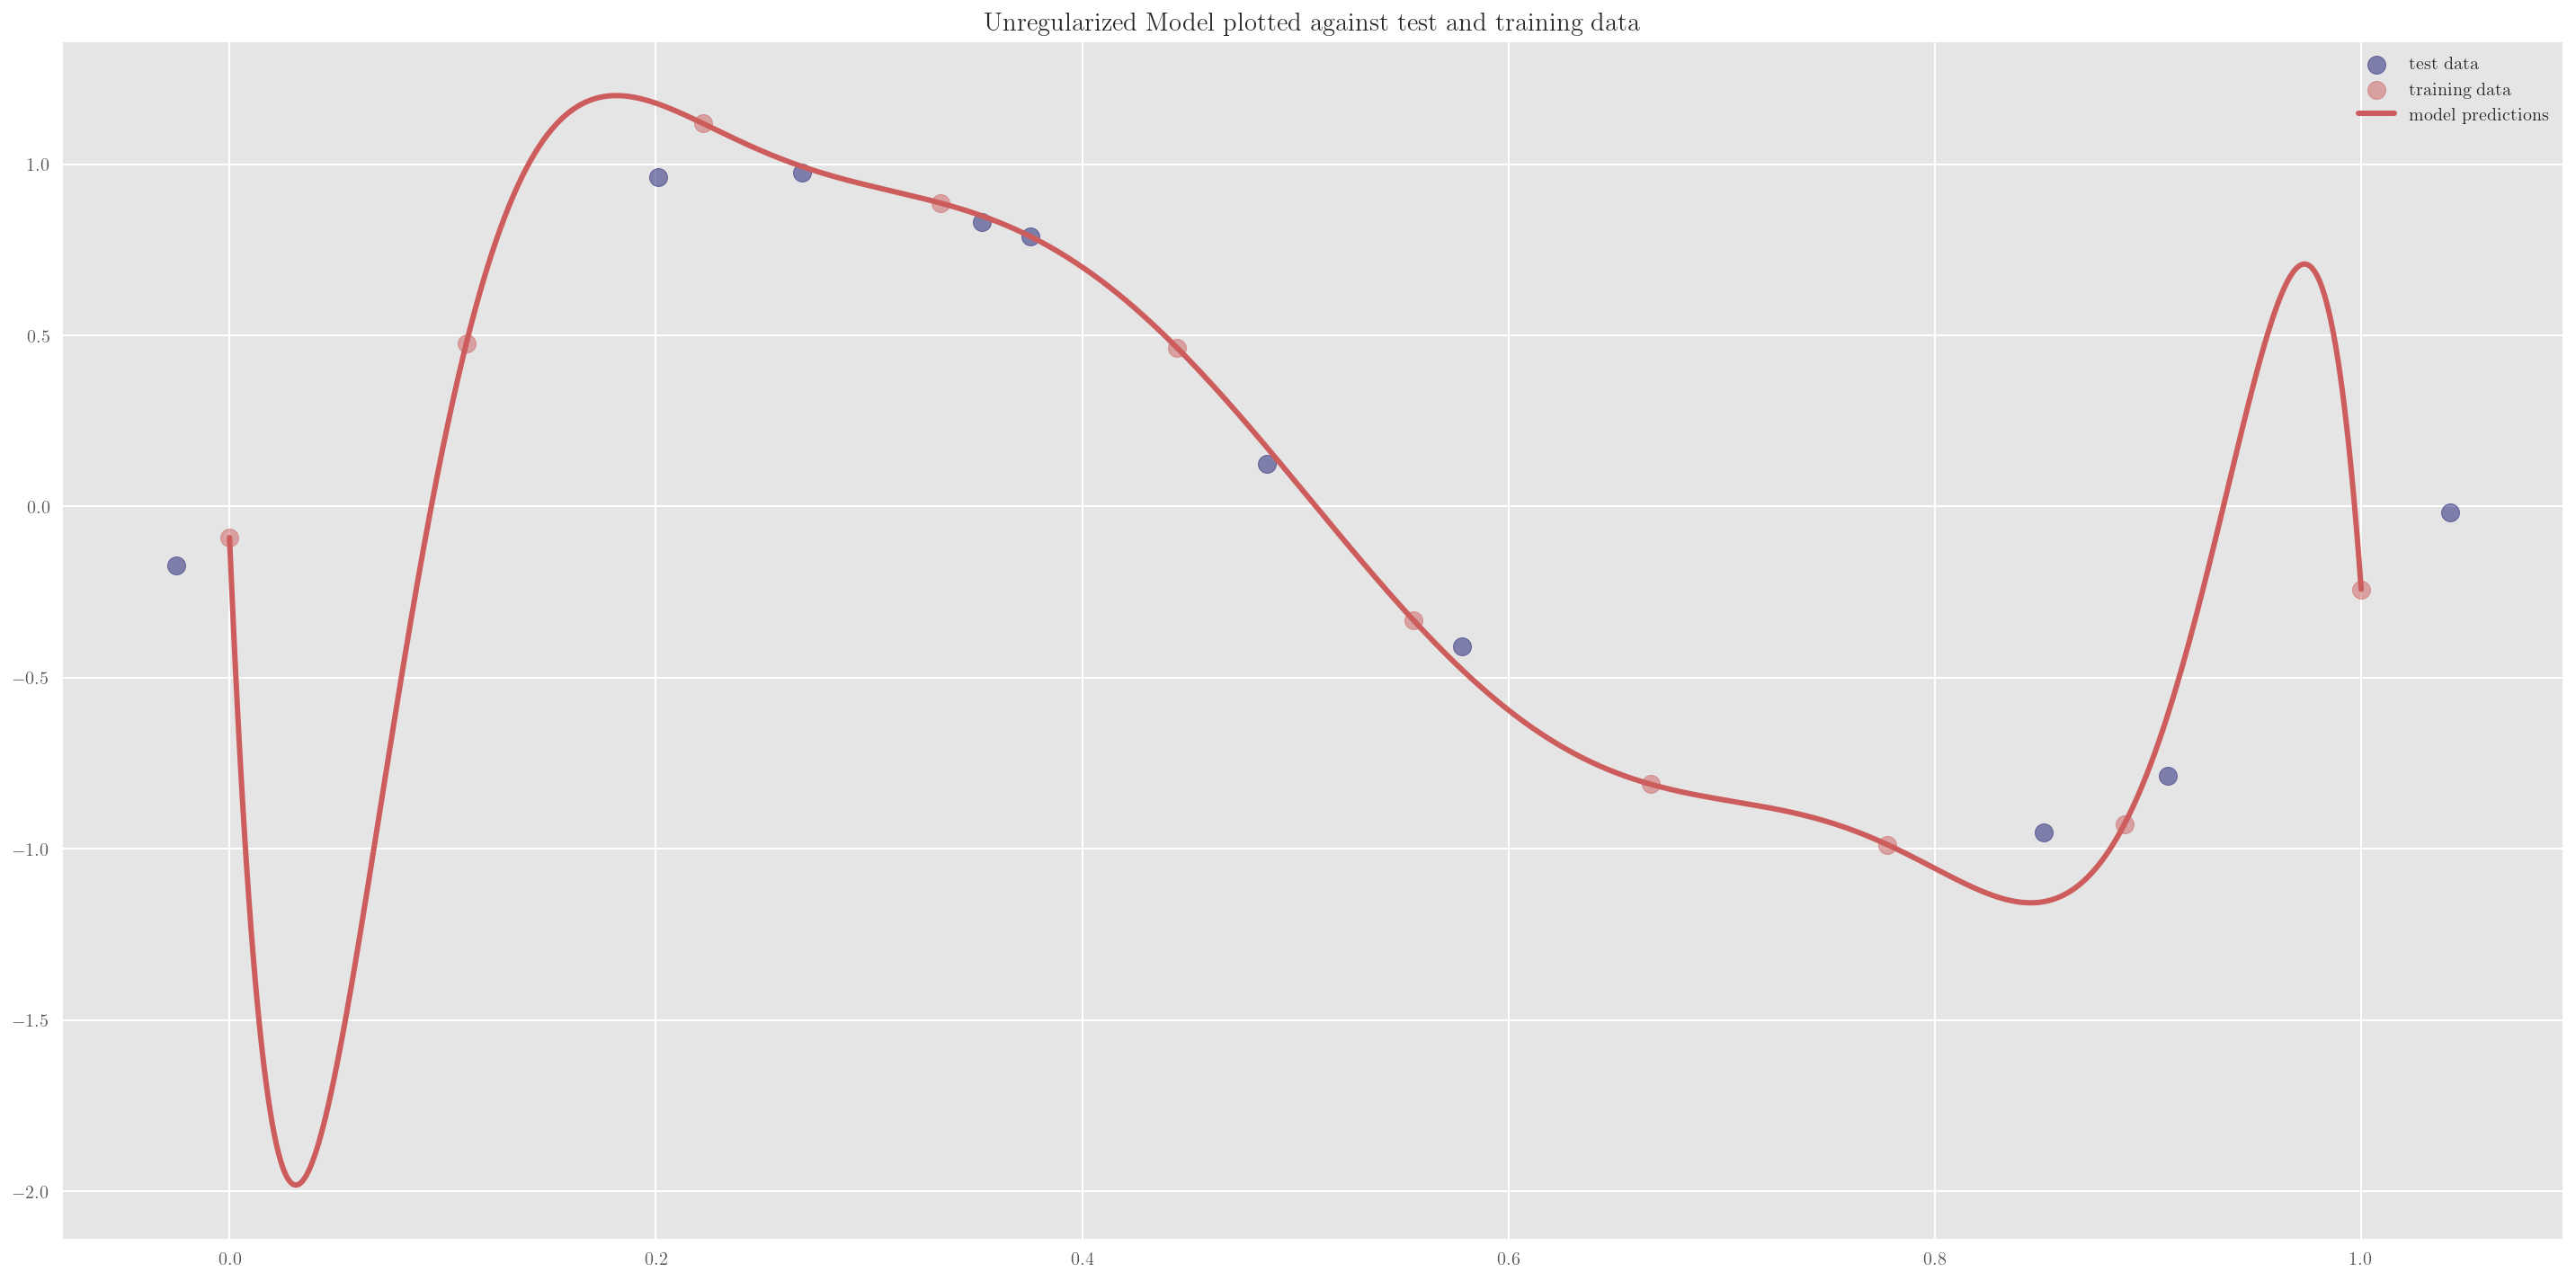

In [6]:
# First, create predictions on a lot of data in the interval.
xx = np.linspace(0,1,1000).reshape(1000,1)
yy = model.predict(xx)

# Next plot it out against the test data.
plt.scatter(x_test,y_test, c='midnightblue', s=100, alpha=0.5, label='test data')
plt.scatter(x_train,y_train, c='indianred', s=100, alpha=0.5, label='training data')
plt.plot(xx, yy, c='indianred', linewidth=3, label='model predictions')
plt.legend()
plt.title(rf'Unregularized Model plotted against test and training data')
plt.tight_layout()

## With Ridge regularization

In [7]:
ridge  = Ridge(alpha=0.05)

# Try with 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, ...., 10
#ridge = RidgeCV()

model = Pipeline(steps=[
    ('standard-scaler', scaler),
    ('polynomials', polynomials),
    ('ridge', ridge)
])

x_train = x_train.reshape((x_train.shape[0],1))
x_test = x_train.reshape((x_train.shape[0], 1))

model.fit(x_train, y_train)
print ("The cofficients: {}".format(model.named_steps['ridge'].coef_))


The cofficients: [ 0.         -1.5481033   0.04057626  0.15936107  0.03770824  0.2448284
 -0.06536346  0.11951761 -0.12340319 -0.01118416  0.05500773 -0.01939319]


Let us now look at the predictions of this model:

In [8]:
ŷ = model.predict(x_test)
print(x_test)
r2= r2_score(y_test, ŷ)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, ŷ))
r2 = r2_score(y_test, ŷ)
print(rf"Coefficient of Determination (R^2):{r2}")

[[0.        ]
 [0.11111111]
 [0.22222222]
 [0.33333333]
 [0.44444444]
 [0.55555556]
 [0.66666667]
 [0.77777778]
 [0.88888889]
 [1.        ]]
Mean squared error: 0.08
Coefficient of Determination (R^2):0.8390248271194602


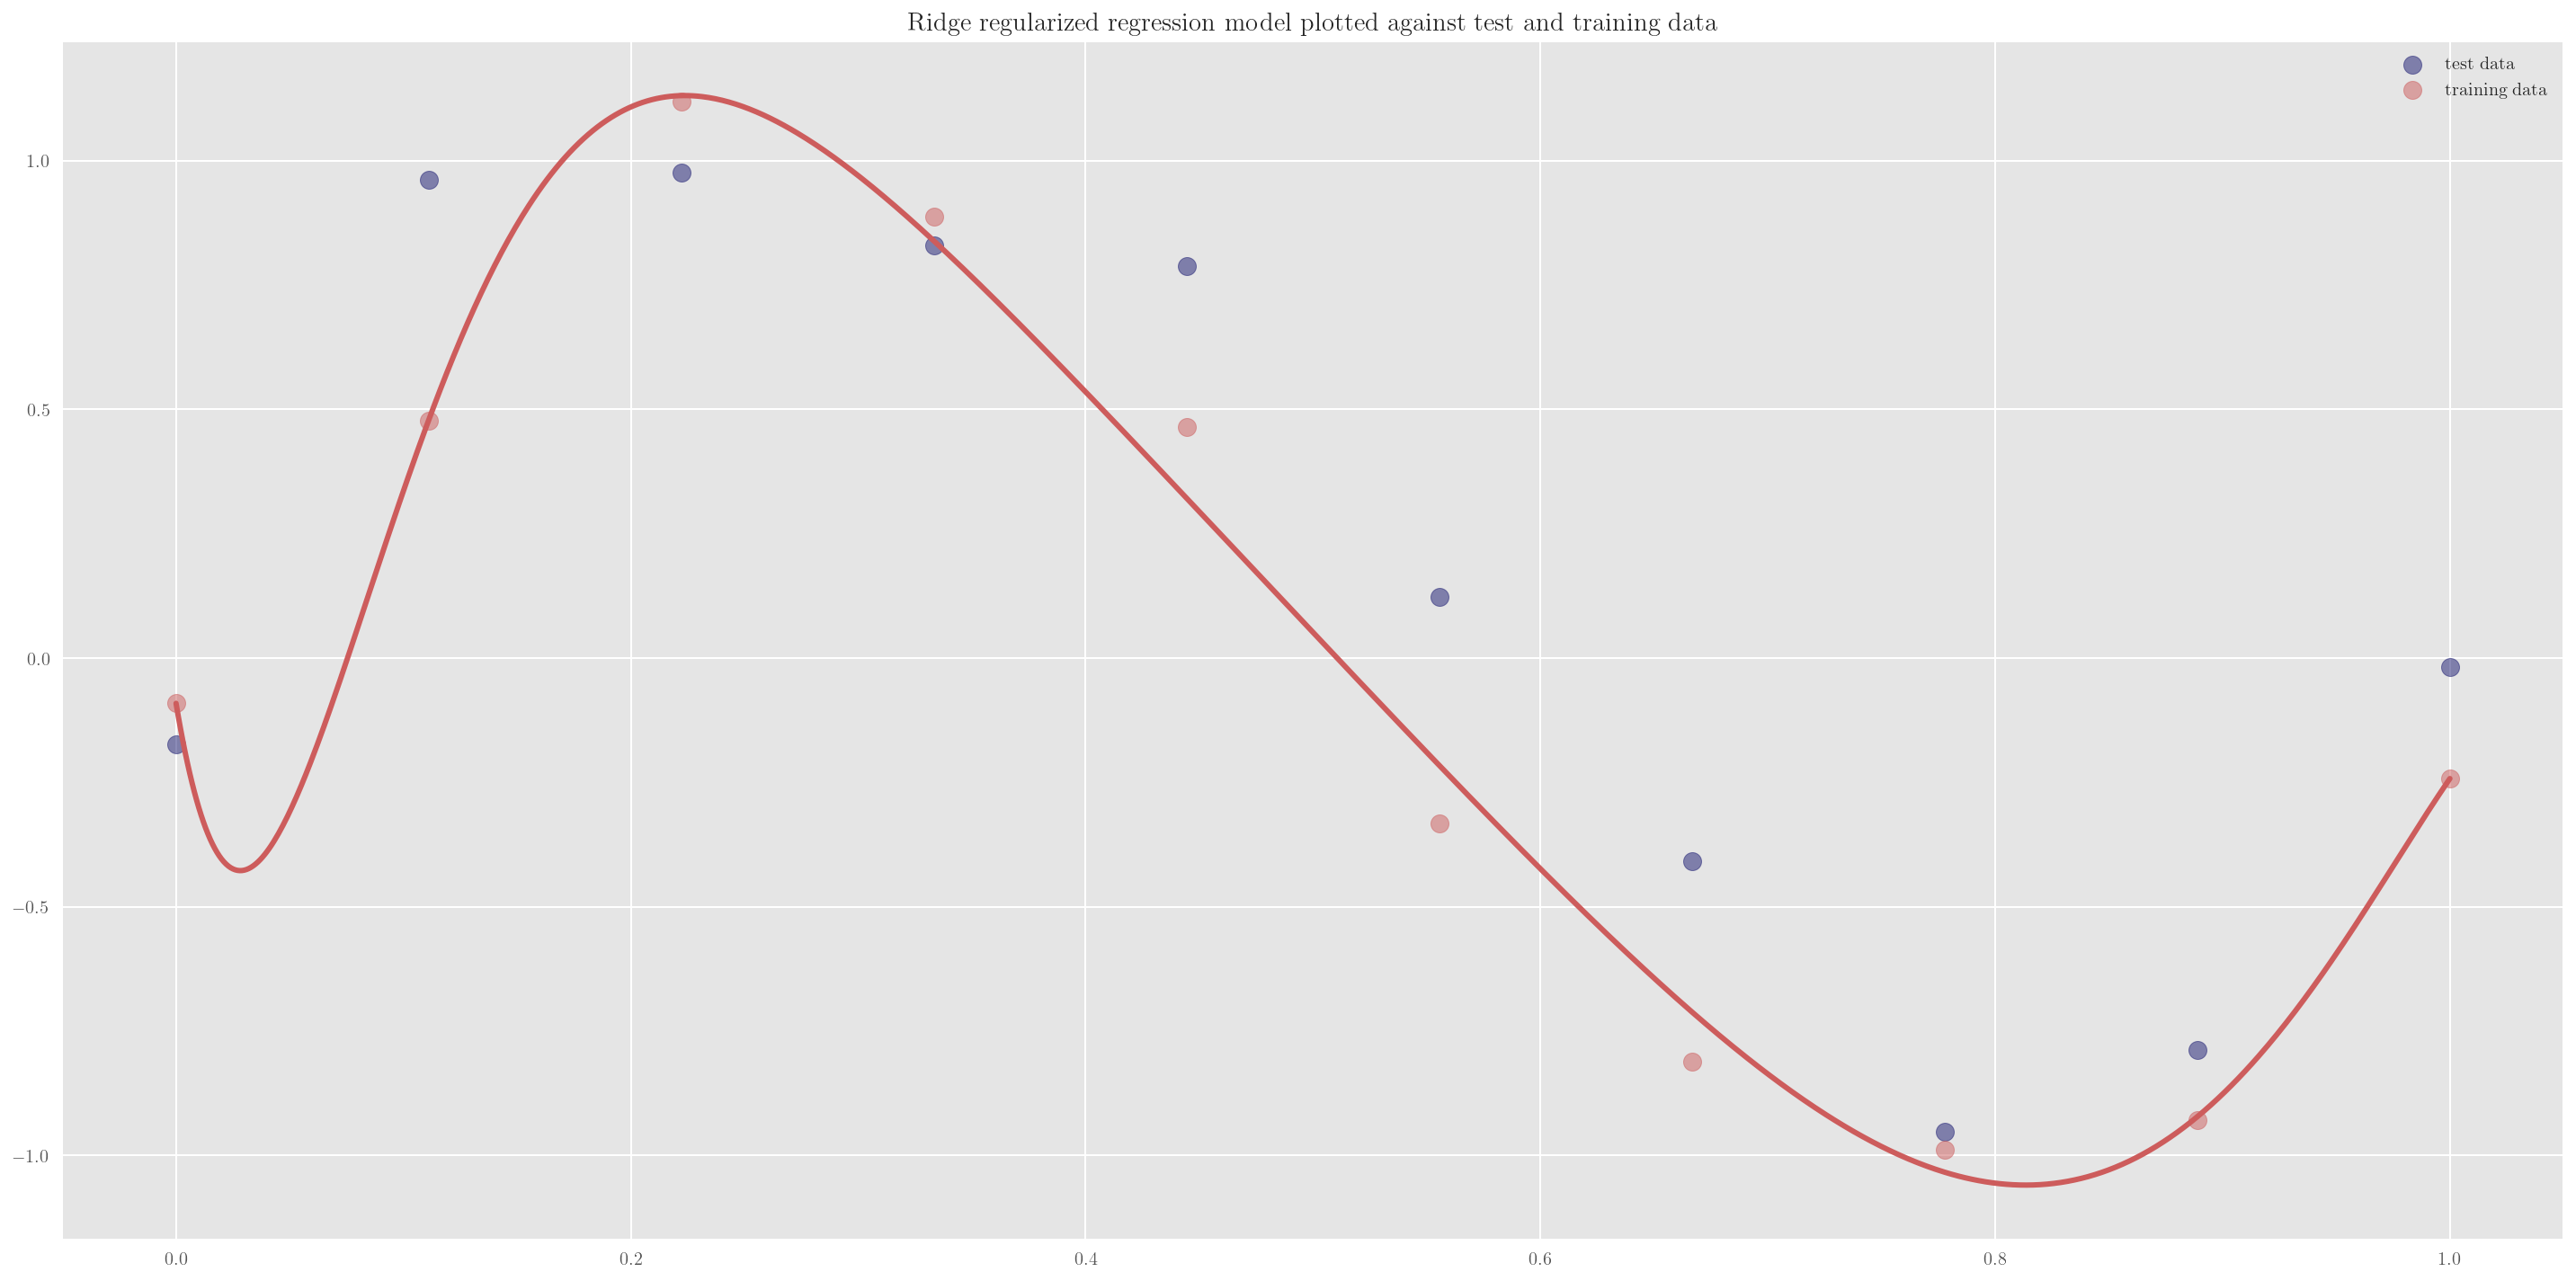

In [9]:
# First, create predictions on a lot of data in the interval.
xx = np.linspace(0,1,1000).reshape(1000,1)
yy = model.predict(xx)

# Next plot it out against the test data.
plt.scatter(x_test,y_test, c='midnightblue', s=100, alpha=0.5, label='test data')
plt.scatter(x_train,y_train, c='indianred', s=100, alpha=0.5, label='training data')
plt.legend()
plt.plot(xx, yy, c='indianred', linewidth=3, label='model predictions')
plt.title(rf'Ridge regularized regression model plotted against test and training data')
plt.tight_layout()

### Observations

* Observe how the model is a simpler one, and more closely agrees with our intuition.
* The model does not overfit the training data -- note how it does not go through all of the training datapoints, but only some near the periphery.
* The Runge phenomenon is apparent, and remains to an extent despite the regularlization. It is significantly muted, though.
* However, visualizing the model gives us a clear indication that the Ridge regression has led to a much simpler model, to be preferred.